# Understanding Seattle Airbnb Data

## Content

1. Business Questions  
    1.1 What is driving the prices ?  
    1.2 When are people paying the high prices ?  
    1.3 Which area is having the highest price ?
2. Data Preparation  
    2.1 Retrieve Data  
    2.2 Overview and Exploration  
    2.3 Treatment of missing data  
    2.4 Removal of irrelevant columns  
    2.5 Removal of unstructured text columns  
    2.6 Feature engineering of amenities columns  
    2.7 Transforming strings and currencies into numerical values  
    2.8 Encoding of categorical variables  
    2.9 Analysis of missing values  
3. Business Questions  
    3.1 Business Question 1: What drives higher prices ?  
        3.1.1 Splitting of data into test and training data and imputation (all features)  
        3.1.2 Scaling and normalization (all features)  
        3.1.3 Regression using different models (all features)  
        3.1.4 Preliminary analysis (all features)  
        3.1.5 Splitting of data into test and training data and imputation (amenities)  
        3.1.6 Scaling and normalization (amenities)
        3.1.7 Regression using different models (amenities)  
        3.1.8 Preliminary analysis (amenities)  
        3.1.9 Final analysis of results  
    3.2 Business Question 2: When are the highest prices paid ?  
        3.2.1 Data preparation  
        3.2.2 Analysis of results  
    3.3 Business Question 3: Where are the highest prices paid ?  
        3.3.1 Data preparation  
        3.3.2 Analysis of results  
4. Conclusion 
        
    

## 1. Business Questions
I did the analysis from the perspective of a Seattle homeowner. What can a Seattle homeowner do in order to maximize his revenues. This results in the set of following questions:

### 1.1 What is driving higher prices ?
In case I intend to modernize my home or install some amenities, it would be usesful to know which amenities and features have the highest impact on prices. We will try to analyze the effects of amenities and other properties on prices.

### 1.2 When are people paying the high prices ?
In order to prepare my home for an upcoming season, it would be useful to know what are the most popular times in the year. In case there are events like trade shows, prices should be adjusted during these events.

### 1.3 Which area is having the highest price ?
In case I plan to buy a home in the Seattle area, it would be helpfull to know where the highest prices for Airbnb bookings are paid.

## 2. Data Preparation

### 2.1 Retrieve Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from IPython import display
import collections
from time import time
from itertools import chain
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
import seaborn as sns


%matplotlib inline

In [2]:
df_listings = pd.read_csv("data/listings.csv")
df_calendar = pd.read_csv("data/calendar.csv")
df_reviews = pd.read_csv("data/reviews.csv")

### 2.2 Overview and Exploration

In [3]:
# Set some display options
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 2000)

In [4]:
# Check number of rows and columns
print(df_listings.shape)
print(df_calendar.shape)
print(df_reviews.shape)

(3818, 92)
(1393570, 4)
(84849, 6)


In [5]:
# Get column names
print(df_listings.columns.values)
print(df_calendar.columns.values)
print(df_reviews.columns.values)

['id' 'listing_url' 'scrape_id' 'last_scraped' 'name' 'summary' 'space'
 'description' 'experiences_offered' 'neighborhood_overview' 'notes'
 'transit' 'thumbnail_url' 'medium_url' 'picture_url' 'xl_picture_url'
 'host_id' 'host_url' 'host_name' 'host_since' 'host_location'
 'host_about' 'host_response_time' 'host_response_rate'
 'host_acceptance_rate' 'host_is_superhost' 'host_thumbnail_url'
 'host_picture_url' 'host_neighbourhood' 'host_listings_count'
 'host_total_listings_count' 'host_verifications' 'host_has_profile_pic'
 'host_identity_verified' 'street' 'neighbourhood'
 'neighbourhood_cleansed' 'neighbourhood_group_cleansed' 'city' 'state'
 'zipcode' 'market' 'smart_location' 'country_code' 'country' 'latitude'
 'longitude' 'is_location_exact' 'property_type' 'room_type'
 'accommodates' 'bathrooms' 'bedrooms' 'beds' 'bed_type' 'amenities'
 'square_feet' 'price' 'weekly_price' 'monthly_price' 'security_deposit'
 'cleaning_fee' 'guests_included' 'extra_people' 'minimum_nights'
 'm

In [6]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


There are 3 datasets:

- listings
- calendar
- reviews

The most relevant dataset for our analysis is the listings dataset. The calendar dataset is relevant for answering the third question about popular times.

Since the reviews dataset is mainly unstructured data, we will postpone any analysis.

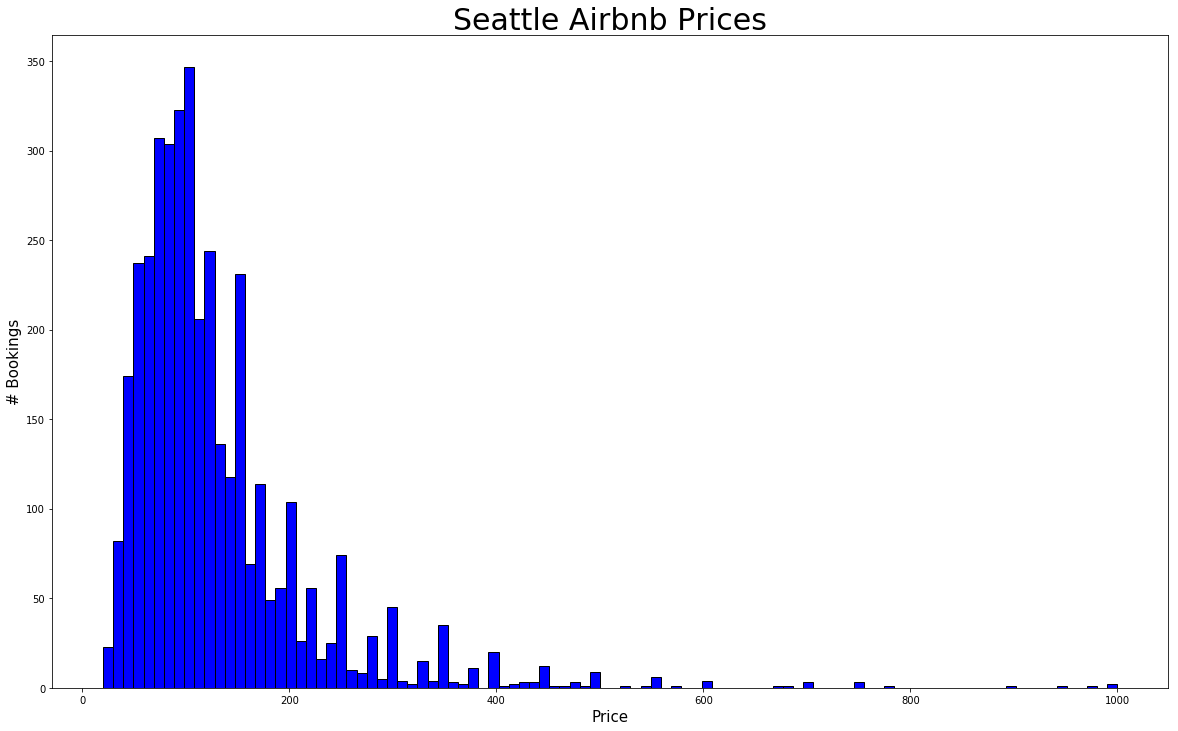

In [7]:
fig, ax = plt.subplots(figsize=(20, 12))

plt.hist(df_listings['price'].replace('[\$,]', '', regex=True).astype(float), color = 'blue', edgecolor = 'black',
         bins = 100)
ax.set_title('Seattle Airbnb Prices', fontsize=30)
ax.set_xlabel('Price')
ax.set_ylabel('# Bookings')
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)

There is a large range of prices for Seattle homes. Up to 1000 dollar per day are paid. Prices values that are an integer multiple of 100 or 50 like 200, 250, 300 seem to be preferred. 

In [8]:
df_listings['price'].replace('[\$,]', '', regex=True).astype(float).describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

### 2.3 Treatment of missing data

In [9]:
# Check for missing values in listings
(df_listings.isnull().sum()/len(df_listings)).sort_values(ascending=False)

license                             1.000000
square_feet                         0.974594
monthly_price                       0.602672
security_deposit                    0.511262
weekly_price                        0.473808
notes                               0.420639
neighborhood_overview               0.270299
cleaning_fee                        0.269775
transit                             0.244631
host_about                          0.224987
host_acceptance_rate                0.202462
review_scores_accuracy              0.172342
review_scores_checkin               0.172342
review_scores_value                 0.171818
review_scores_location              0.171556
review_scores_cleanliness           0.171032
review_scores_communication         0.170508
review_scores_rating                0.169460
reviews_per_month                   0.164222
first_review                        0.164222
last_review                         0.164222
space                               0.149031
host_respo

In [10]:
# Check columns >=25% missing values
[cols for cols in df_listings.columns.values if (df_listings[cols].isnull().sum()/len(df_listings))>=0.25]

['neighborhood_overview',
 'notes',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'license']

In [11]:
# Distribution of missing values.
(df_listings.isnull().sum()/len(df_listings)).describe()

count    92.000000
mean      0.084893
std       0.181492
min       0.000000
25%       0.000000
50%       0.000000
75%       0.136983
max       1.000000
dtype: float64

There are a number of columns containing missing values. The license column has no values at all.

There are no missing values in the price column, perhaps this column can be used instead of weekly and monthly prices. But there seems to be no good substitute for square_feet.

In [12]:
df_listings[['monthly_price', 'weekly_price', 'price']].head(5)

,monthly_price,weekly_price,price
0,NaN,NaN,$85.00
1,"$3,000.00","$1,000.00",$150.00
2,NaN,NaN,$975.00
3,"$2,300.00",$650.00,$100.00
4,NaN,NaN,$450.00


In [13]:
df_listings[['monthly_price', 'weekly_price', 'price']].replace('[\$,]','',regex=True).astype(float).corr()

,monthly_price,weekly_price,price
monthly_price,1.000000,0.942644,0.873450
weekly_price,0.942644,1.000000,0.937861
price,0.873450,0.937861,1.000000


The price field seems to indicate a daily price, therefore I will drop the monthly and weekly prices from the dataset due to a large number of missing values. The price field should act as a good substitute.

In [14]:
df_listings[df_listings['square_feet'].notnull()][['square_feet', 'bathrooms', 'bedrooms', 'beds']].corr()

,square_feet,bathrooms,bedrooms,beds
square_feet,1.000000,0.381094,0.448786,0.312155
bathrooms,0.381094,1.000000,0.418992,0.303472
bedrooms,0.448786,0.418992,1.000000,0.742920
beds,0.312155,0.303472,0.742920,1.000000


The bathrooms and bedroom field will be used as substitutes for the mostly missing square_feet field.

In [15]:
df_listings[['security_deposit']].head(5)

,security_deposit
0,NaN
1,$100.00
2,"$1,000.00"
3,NaN
4,$700.00


A missing security deposit can probably replaced by a value of 0.

In [16]:
df_listings[['neighborhood_overview']].head(5)

,neighborhood_overview
0,NaN
1,"Queen Anne is a wonderful, truly functional village. You can walk everywhere... for coffee, for groceries, for a night out, for breathtaking views of the Puget Sound."
2,"Upper Queen Anne is a charming neighborhood full of a mix of beautifully maintained, turn-of-the-century craftsman homes, tudors and modern homes. The ""main drag"" is Queen Anne Ave. with a great selection of boutiques, restaurants, coffee shops and bars. Upper Queen Anne is just 1.5 miles from downtown Seattle, and situated on a hilltop with stunning panoramic views in every direction -- downtown Seattle, the Space Needle and Mt. Rainier to the southeast, Elliott Bay to the southwest, the Olympic Mountains to the west and the Cascade Mountains to the east. If you're a walker, you'll love the 4-mile ""Crown of Queen Anne"" loop which takes in all of these views!"
3,NaN
4,"We are in the beautiful neighborhood of Queen Anne on 14th Ave. W. A 5 minute walk from Whole Foods Market. Take a 5 minute drive south or north and find yourself in the lively neighborhood of Belltown or charming neighborhood of Ballard (respectively). Upper Queen Anne shops and restaurants are a 20 minute walk or a quick 5 minute drive up the hill. The Seattle Center (The Space Needle, the Children's Museum, EMP, Pacific Science Center, Chihuly Garden and Glass) is a 7 minute drive."


In [17]:
df_listings[['notes']].head(5)

,notes
0,NaN
1,"What's up with the free pillows? Our home was renovated and restored with health & safety in mind, especially the elimination/reduction of indoor allergens, toxins & other pollutants. (For this reason, we have no carpets, just hardwood & slate floors, with radiant heat.) Pillows tend to house a LOT of allergens over time, even when just used by a single owner. The statistics make many people feel pretty queasy but, essentially, pillows become great breeding grounds for bacteria and dust mites, not to mention drool, hair oils and perspiration. Since most people sweat more than a pint a night, the pillow can also easily trap mildew and mold. We use dust mite protectors for mattresses and duvets, but haven't found any that work well for pillows that maintain comfort/elasticity without the use of outgassing materials. So, I let the guests take their pillows but ask that they leave the pillowcases. And if you leave the pillows behind, they'll be donated to a local women's shelter that"
2,"Our house is located just 5 short blocks to Top Pot Doughnuts, Tribunali pizza, Caffe Fiore, Trader Joes and Molly Moons. Just 8 blocks to Queen Anne Ave."
3,NaN
4,Belltown


Since the neighborhood_overviewa and notes columns are unstructured text, that would requiere a sentiment analysis, these columns will be dropped.

In [18]:
df_listings[['cleaning_fee']].head(5)

,cleaning_fee
0,NaN
1,$40.00
2,$300.00
3,NaN
4,$125.00


A missing cleaning fee can probably replaced by a value of 0.

In [19]:
(df_calendar.isnull().sum()/len(df_calendar)).sort_values(ascending=False)

price         0.32939
available     0.00000
date          0.00000
listing_id    0.00000
dtype: float64

Again the price column is missing in a lot of rows (33%).

In [20]:
(df_reviews.isnull().sum()/len(df_reviews)).sort_values(ascending=False)

comments         0.000212
reviewer_name    0.000000
reviewer_id      0.000000
date             0.000000
id               0.000000
listing_id       0.000000
dtype: float64

There are no missing data for reviews except for a small number of missing comments.

In [21]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to everything!
1,7202016,39087409,2015-07-20,32440555,Frank,"Kelly has a great room in a very central location. \nBeautiful building , architecture and a style that we really like. \nWe felt guite at home here and wish we had spent more time.\nWent for a walk and found Seattle Center with a major food festival in progress. What a treat.\nVisited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW. Thanks for a great stay."
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighborhood. This is the kind of apartment I wish I had!\n\nDidn't really get to meet Kelly until I was on my out, but she was always readily available by phone. \n\nI believe the only ""issue"" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a Friday"
3,7202016,40813543,2015-08-02,33671805,George,"Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you'll ever find). Easy to find and Kelly was warm, welcoming, and really interesting to talk to."
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating in a great neighborhood. She has some great coffee and while I wasn't around much during my stay the time I spent interacting with her was very pleasant. \n\nThe apartment is in a great location and very close to the Seattle Center. The neighborhood itself has a lot of good food as well!


### 2.4 Remove irrelevant columns

For reasons described above the following columns will be dropped:
    
- neighborhood_overview
- notes
- square_feet
- weekly_price
- monthly_price,
- license

In [22]:
# Drop columns
df_listings.drop(columns=[
    'neighborhood_overview', 'notes', 'square_feet', 'weekly_price', 'monthly_price', 'license'],inplace=True)

For reasons described above the missing values for cleaning_fee and security_deposit will be replaced with numeric 0.

In [23]:
# Fill missing values with 0
df_listings['security_deposit']=df_listings['security_deposit'].fillna(0)
df_listings['cleaning_fee']=df_listings['cleaning_fee'].fillna(0)

In [24]:
# Since the id column has no meaningful content, this column will be dropped, too. 
# We may need this column later as a join condition, but for now we drop the column.
df_listings.drop(columns=['id'],inplace=True)

There are several columns that seem to be irrelevant for the analysis. (Unique values, URL's that link to pictures)

In [25]:
# Columns with unique values
unique_cols=[col for col in df_listings.columns.values if df_listings[col].nunique()==1]
unique_cols

['scrape_id',
 'last_scraped',
 'experiences_offered',
 'market',
 'country_code',
 'country',
 'has_availability',
 'calendar_last_scraped',
 'requires_license',
 'jurisdiction_names']

In [26]:
df_listings.drop(columns=unique_cols,inplace=True)

In [27]:
#URL columns
url_cols=[col for col in df_listings.columns.values if 'url' in col]
url_cols

['listing_url',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url']

In [28]:
df_listings.drop(columns=url_cols,inplace=True)

The host columns like host_id, host_name, host_since, host_location, host_about, host_verifications seem to contain irrelevant information. 

In [29]:
host_cols=['host_id', 'host_name', 'host_since', 'host_location', 'host_about', 'host_verifications', 'host_total_listings_count']
df_listings.drop(columns=host_cols,inplace=True)

City, State, Street, smart_location, latitude and longitude are redundant data since all listings are in Seattle, WA. Zip code and neighbarhood are probably better variables.

In [30]:
location_cols=['state', 'city','street','smart_location', 'latitude','longitude']
df_listings.drop(columns=location_cols,inplace=True)

There seems to be some redundancy within the neighbourhood data.

In [31]:
# Check neighbourhood columns
print(df_listings['host_neighbourhood'].unique())
print(df_listings['neighbourhood_cleansed'].unique())
print(df_listings['neighbourhood_group_cleansed'].unique())
print(df_listings['neighbourhood'].unique())

['Queen Anne' nan 'Ballard' 'Belltown' 'Phinney Ridge' 'Alki' 'Fremont'
 'Holly' 'Lower Queen Anne' 'Green Lake' 'Eastlake' 'Ravenna' 'Westlake'
 'Columbia City' 'South Park' 'Kaanapali' 'Wallingford' 'Capitol Hill'
 'Long Beach' 'Northwest District' 'Waianae Coast' 'Minor' 'Magnolia'
 'Madrona' 'Harrison/Denny-Blaine' 'Leschi' 'University District'
 'Roosevelt' 'Mission District' 'Madison Park' 'Stevens'
 'Central San Pedro' 'Atlantic' 'North Beacon Hill'
 'Central Business District' 'Pike Place Market' 'Portage Bay'
 'South Lake Union' 'Fenway/Kenmore' 'East Village' 'Clairemont Mesa East'
 'Forestland' 'Hollywood' 'Manhattan Beach' 'Downtown Toronto'
 'International District' 'Yesler Terrace' 'First Hill' 'Anaheim'
 'Maple Leaf' 'Seward Park' 'Pioneer Square' 'Gatewood' 'The Junction'
 'North Admiral' 'Arbor Heights' 'North Hollywood' 'Kauaʻi' 'Genesee'
 'Crown Hill' 'Interbay' 'Industrial District' 'Holly Park' 'Georgetown'
 'South Beacon Hill' 'Greenwood' 'Bitter Lake' 'Beverly Hi

I decided to use neighbourhood_group_cleansed in order to avoid a large number of dummy variables.

In [32]:
nb_cols=['neighbourhood','host_neighbourhood','neighbourhood_cleansed']
df_listings.drop(columns=nb_cols,inplace=True)

The variables first_review, last_review and calendar_updated are dates. They seem not to be relevant for question 1.

In [33]:
date_cols=['first_review','last_review','calendar_updated']
df_listings.drop(columns=date_cols,inplace=True)

### 2.5 Removal of unstructured text columns

We can see that there are a number of columns with unstructured data in the form of sentences, for example name, summary, description, neighbourhood_overview.

In [34]:
# Drop columns containing unstructured text data
text_cols=['name','summary', 'space', 'description','transit']
df_listings.drop(columns=text_cols,inplace=True)

### 2.6 Feature enginnering of amenities columns

Since the amenities column is a list of amenities, we have to extract each amenity and transform it into a categorical variable.

In [35]:
# Split up amenities
df_amenities=df_listings['amenities'].str.split(',',expand=True)
df_amenities.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,{TV,"""Cable TV""",Internet,"""Wireless Internet""","""Air Conditioning""",Kitchen,Heating,"""Family/Kid Friendly""",Washer,Dryer},None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,{TV,Internet,"""Wireless Internet""",Kitchen,"""Free Parking on Premises""","""Buzzer/Wireless Intercom""",Heating,"""Family/Kid Friendly""",Washer,Dryer,"""Smoke Detector""","""Carbon Monoxide Detector""","""First Aid Kit""","""Safety Card""","""Fire Extinguisher""",Essentials},None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,{TV,"""Cable TV""",Internet,"""Wireless Internet""","""Air Conditioning""",Kitchen,"""Free Parking on Premises""","""Pets Allowed""","""Pets live on this property""",Dog(s),Cat(s),"""Hot Tub""","""Indoor Fireplace""",Heating,"""Family/Kid Friendly""",Washer,Dryer,"""Smoke Detector""","""Carbon Monoxide Detector""",Essentials,Shampoo},None,None,None,None,None,None,None,None,None
3,{Internet,"""Wireless Internet""",Kitchen,"""Indoor Fireplace""",Heating,"""Family/Kid Friendly""",Washer,Dryer,"""Smoke Detector""","""Carbon Monoxide Detector""","""Safety Card""","""Fire Extinguisher""",Essentials,Shampoo},None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,{TV,"""Cable TV""",Internet,"""Wireless Internet""",Kitchen,Heating,"""Family/Kid Friendly""","""Smoke Detector""","""Carbon Monoxide Detector""","""First Aid Kit""","""Fire Extinguisher""",Essentials,Shampoo},None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


We need to remove redundant punctuation and transforming to unique values to create the categorical features.

In [36]:
# Remove special characters from amenities dataframe
df_amenities = df_amenities.replace('[^\w\s]','', regex=True)

# Add all amenities in dataframe to list
amenities_unique=[df_amenities[x].unique().tolist() for x in df_amenities.columns.values]

# Get unique values of amenities
amenities_unique=set(list(chain.from_iterable(amenities_unique)))
print(amenities_unique)

# Remove '' and None values
amenities_unique.remove('')
amenities_unique.remove(None)
print('Removed null values:')
print(amenities_unique)

{'', 'Cats', 'Other pets', 'FamilyKid Friendly', 'Shampoo', 'Washer', 'Hair Dryer', 'Pets Allowed', 'Breakfast', 'Iron', 'Carbon Monoxide Detector', 'Hangers', '24Hour Checkin', 'Cable TV', 'Smoke Detector', 'TV', 'Hot Tub', 'First Aid Kit', 'Pets live on this property', 'Gym', 'Dryer', 'Free Parking on Premises', 'Smoking Allowed', 'Heating', 'Lock on Bedroom Door', 'Internet', None, 'Air Conditioning', 'BuzzerWireless Intercom', 'Doorman', 'Laptop Friendly Workspace', 'Pool', 'Essentials', 'Safety Card', 'Suitable for Events', 'Fire Extinguisher', 'Washer  Dryer', 'Wireless Internet', 'Kitchen', 'Dogs', 'Elevator in Building', 'Indoor Fireplace', 'Wheelchair Accessible'}
Removed null values:
{'Cats', 'Other pets', 'FamilyKid Friendly', 'Shampoo', 'Washer', 'Hair Dryer', 'Pets Allowed', 'Breakfast', 'Iron', 'Carbon Monoxide Detector', 'Hangers', '24Hour Checkin', 'Cable TV', 'Smoke Detector', 'TV', 'Hot Tub', 'First Aid Kit', 'Pets live on this property', 'Gym', 'Dryer', 'Free Parking

In [37]:
df_amenities.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Heating,FamilyKid Friendly,Washer,Dryer,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,TV,Internet,Wireless Internet,Kitchen,Free Parking on Premises,BuzzerWireless Intercom,Heating,FamilyKid Friendly,Washer,Dryer,Smoke Detector,Carbon Monoxide Detector,First Aid Kit,Safety Card,Fire Extinguisher,Essentials,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Free Parking on Premises,Pets Allowed,Pets live on this property,Dogs,Cats,Hot Tub,Indoor Fireplace,Heating,FamilyKid Friendly,Washer,Dryer,Smoke Detector,Carbon Monoxide Detector,Essentials,Shampoo,None,None,None,None,None,None,None,None,None
3,Internet,Wireless Internet,Kitchen,Indoor Fireplace,Heating,FamilyKid Friendly,Washer,Dryer,Smoke Detector,Carbon Monoxide Detector,Safety Card,Fire Extinguisher,Essentials,Shampoo,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,TV,Cable TV,Internet,Wireless Internet,Kitchen,Heating,FamilyKid Friendly,Smoke Detector,Carbon Monoxide Detector,First Aid Kit,Fire Extinguisher,Essentials,Shampoo,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [38]:
# Create binary amenity columns
for index in range(30):
    for a in amenities_unique:
        df_amenities[a] = 0

for index in range(30):
    for a in amenities_unique:
        df_amenities[a] += np.where(df_amenities[index] == a, 1, 0)

# Drop redundant column
df_amenities.drop(columns=[x for x in range(30)],inplace=True)

In [39]:
# Append amenities columns to original dataframe
df_listings=df_listings.join(df_amenities,how='left')

# Drop amenities column
df_listings.drop(columns='amenities',inplace=True)

### 2.7 Transforming strings and currencies into numerical values

There are several numerical features encoded as strings:

- host_response_rate (percentage)
- host_acceptance_rate (percentage)
- price (currency)
- security_deposit (currency)
- cleaning_fee (currency)
- extra_people

All these variables have to be changed into numerical values (integers or float).


In [40]:
# Replace percentages using a regular expression
cols=['host_response_rate','host_acceptance_rate']
df_listings[cols] = df_listings[cols].replace('%', '', regex=True).astype(float)

# Convert into numeric values
df_listings[cols]=df_listings[cols]/100
df_listings[cols].head(5)

,host_response_rate,host_acceptance_rate
0,0.96,1.0
1,0.98,1.0
2,0.67,1.0
3,NaN,NaN
4,1.00,NaN


In [41]:
# Remove dollar signs
cols=['price', 'security_deposit','cleaning_fee','extra_people']
df_listings[cols]=df_listings[cols].replace('[\$,]', '', regex=True).astype(float)
df_listings[cols].head(5)

,price,security_deposit,cleaning_fee,extra_people
0,85.0,0.0,0.0,5.0
1,150.0,100.0,40.0,0.0
2,975.0,1000.0,300.0,25.0
3,100.0,0.0,0.0,0.0
4,450.0,700.0,125.0,15.0


In [42]:
df_listings.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,zipcode,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Cats,Other pets,FamilyKid Friendly,Shampoo,Washer,Hair Dryer,Pets Allowed,Breakfast,Iron,Carbon Monoxide Detector,Hangers,24Hour Checkin,Cable TV,Smoke Detector,TV,Hot Tub,First Aid Kit,Pets live on this property,Gym,Dryer,Free Parking on Premises,Smoking Allowed,Heating,Lock on Bedroom Door,Internet,Air Conditioning,BuzzerWireless Intercom,Doorman,Laptop Friendly Workspace,Pool,Essentials,Safety Card,Suitable for Events,Fire Extinguisher,Washer Dryer,Wireless Internet,Kitchen,Dogs,Elevator in Building,Indoor Fireplace,Wheelchair Accessible
0,within a few hours,0.96,1.0,f,3.0,t,t,Queen Anne,98119,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,85.0,0.0,0.0,2,5.0,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,within an hour,0.98,1.0,t,6.0,t,t,Queen Anne,98119,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,150.0,100.0,40.0,1,0.0,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,1,1,0,0,0,0
2,within a few hours,0.67,1.0,f,2.0,t,t,Queen Anne,98119,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,975.0,1000.0,300.0,10,25.0,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15,1,0,1,1,1,0,1,0,0,1,0,0,1,1,1,1,0,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0
3,NaN,NaN,NaN,f,1.0,t,t,Queen Anne,98119,t,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,100.0,0.0,0.0,1,0.0,1,1125,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,f,f,1,NaN,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,1,0,0,1,0
4,within an hour,1.00,NaN,f,2.0,t,t,Queen Anne,98119,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,450.0,700.0,125.0,6,15.0,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,strict,f,f,1,0.89,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0


### 2.8 Encoding of categorical variables

The categorical variables are as follows:
    
- host_response_time
- host_is_superhost (binary)
- host_has_profile_pic (binary)
- host_identity_verified (binary)
- neighbourhood_group_cleansed
- zipcode
- is_location_exact (binary)
- property_type
- room_type
- bed_type
- instant_bookable (binary)
- cancellation_policy
- require_guest_profile_picture (binary)
- require_guest_phone_verification (binary)

In [43]:
# Mapping of binary colums to 0 and 1
binary_cols=['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact'
             ,'instant_bookable','require_guest_profile_picture','require_guest_phone_verification']
df_listings[binary_cols]=np.where(df_listings[binary_cols]=='t', 1, 0)

categorical_cols=['host_response_time','neighbourhood_group_cleansed','zipcode'
             ,'property_type','room_type','bed_type','cancellation_policy']

df_listings=pd.get_dummies(data=df_listings, columns=categorical_cols,drop_first=True)

In [44]:
df_listings.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Cats,Other pets,FamilyKid Friendly,Shampoo,Washer,Hair Dryer,Pets Allowed,Breakfast,Iron,Carbon Monoxide Detector,Hangers,24Hour Checkin,Cable TV,Smoke Detector,TV,Hot Tub,First Aid Kit,Pets live on this property,Gym,Dryer,Free Parking on Premises,Smoking Allowed,Heating,Lock on Bedroom Door,Internet,Air Conditioning,BuzzerWireless Intercom,Doorman,Laptop Friendly Workspace,Pool,Essentials,Safety Card,Suitable for Events,Fire Extinguisher,Washer Dryer,Wireless Internet,Kitchen,Dogs,Elevator in Building,Indoor Fireplace,Wheelchair Accessible,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,zipcode_98102,zipcode_98103,zipcode_98104,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98121,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98134,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98177,zipcode_98178,zipcode_98199,zipcode_99 98122,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict
0,0.96,1.0,0,3.0,1,1,1,4,1.0,1.0,1.0,85.0,0.0,0.0,2,5.0,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0,0,0,2,4.07,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0.98,1.0,1,6.0,1,1,1,4,1.0,1.0,1.0,150.0,100.0,40.0,1,0.0,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,6,1.48,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0.67,1.0,0,2.0,1,1,1,11,4.5,5.0,7.0,975.0,1000.0,300.0,10,25.0,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,2,1.15,1,0,1,1,1,0,1,0,0,1,0,0,1,1,1,1,0,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,NaN,NaN,0,1.0,1,1,1,3,1.0,0.0,2.0,100.0,0.0,0.0,1,0.0,1,1125,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,NaN,0,

### 2.9 Analysis of missing values
Inspect the dataset for missing values.

In [45]:
(df_listings.isnull().sum(axis=0).sort_values(ascending=False).head(20)/len(df_listings))*100

host_acceptance_rate           20.246202
review_scores_accuracy         17.234154
review_scores_checkin          17.234154
review_scores_value            17.181771
review_scores_location         17.155579
review_scores_cleanliness      17.103195
review_scores_communication    17.050812
review_scores_rating           16.946045
reviews_per_month              16.422211
host_response_rate             13.698271
bathrooms                       0.419068
bedrooms                        0.157150
host_listings_count             0.052383
beds                            0.026192
Smoke Detector                  0.000000
TV                              0.000000
Hot Tub                         0.000000
First Aid Kit                   0.000000
Pets live on this property      0.000000
Cable TV                        0.000000
dtype: float64

With the exception of host_acceptance_rate, host_response_rate and review_scores_XXX the amount of missing data is now quite low: 

In [46]:
df_listings.host_acceptance_rate.value_counts()

1.0    3044
0.0       1
Name: host_acceptance_rate, dtype: int64

In [47]:
df_listings.host_response_rate.value_counts().head(10)

1.00    2371
0.90     165
0.80     104
0.99      78
0.88      66
0.50      52
0.94      46
0.67      41
0.75      32
0.89      32
Name: host_response_rate, dtype: int64

In [48]:
df_listings.review_scores_value.value_counts()

10.0    1775
9.0     1137
8.0      190
7.0       38
6.0       16
4.0        4
5.0        1
2.0        1
Name: review_scores_value, dtype: int64

The host acceptance rate does not contain significant information, therefore the column will be dropped.

In [49]:
# Drop host_acceptance_rat
df_listings.drop(columns='host_acceptance_rate',inplace=True)

There exists a helper method prepare_listings, that does all the cleaning steps described above.

In [50]:
df_listings.to_csv('df_listings.csv', encoding='utf-8', index=False, sep=";")

All other missing values will be imputed by the median.

## 3 Business Questions
### 3.1 Business Question 1: What drives higher prices ?

We will do the analysis twice. Once for the full set of columns with the exception of the price columns that we try to predict, and just for the amenities related columns.

#### 3.1.1 Splitting of data into test and training data and imputation (all features)

In [51]:
Y = df_listings['price']
x = df_listings.drop('price', axis=1)

In [52]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

In [53]:
# Imputation of test and training data
imputer=Imputer(strategy='median')
X_train_imp=imputer.fit_transform(X_train)
X_test_imp=imputer.transform(X_test)

#### 3.1.2 Scaling and normalization (all features)

In [54]:
# Scaling of test and training data
scaler=StandardScaler()
X_train_scale=scaler.fit_transform(X_train_imp)

# Scale test data
X_test_scale=scaler.transform(X_test_imp)

#### 3.1.3 Regression using different models (all features)
The following methods is from my 'Finding Donors for CharityML' project from term 1:

In [55]:
def train_and_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learn: the learning algorithm used for training and prediction
       - size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: review_scores_rating training set
       - X_test: features testing set
       - y_test: review_scores_rating testing set
    '''
    results = {}
    
    #Fit the learner to the training data and get training time
    start = time() 
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() 
    results['train_time'] = end-start
    
    # Get predictions on the test set(X_test), then get predictions on first 300 training samples
    start = time() 
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() 
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
    
    #Compute accuracy on the first 300 training samples
    results['mse_train'] = mean_squared_error(y_train[:300],predictions_train)
    
    #Compute accuracy on test set
    results['mse_test'] = mean_squared_error(y_test,predictions_test)
       
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    print("MSE_train: %.4f" % results['mse_train'])
    print("MSE_test: %.4f" % results['mse_test'])
    print("Training score:%.4f" % learner.score(X_train,y_train))
    print("Test score:%.4f" % learner.score(X_test,y_test))
    return results

I will use 4 different models for regression:
    - Linear Regression
    - Decisios Trees
    - Logistic Regression
    - Support Vector Maschine

In [56]:
linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor(max_depth=5,min_samples_leaf=10,min_samples_split=10,max_leaf_nodes=8,random_state=42)
logistic_regression = LogisticRegression(random_state=0, solver='lbfgs')
svr_lin = SVR(kernel='linear', C=100, gamma='auto')

Use different sample sizes for training and testing:

In [57]:
# Sample size for 1% and 100% of the training data
samples_100 = len(y_train)
samples_1 = int(0.01*len(y_train))

Do training and testing for the 4 different models.

In [58]:
for i, samples in enumerate([samples_1, samples_100]):
        train_and_predict(linear_regression, samples, X_train_scale, y_train, X_test_scale, y_test)

LinearRegression trained on 30 samples.
MSE_train: 6139.6188
MSE_test: 5794.9739
Training score:0.2909
Test score:0.2860
LinearRegression trained on 3054 samples.
MSE_train: 3650.6184
MSE_test: 3041.1058
Training score:0.6242
Test score:0.6253


In [59]:
for i, samples in enumerate([samples_1, samples_100]):
        train_and_predict(decision_tree, samples, X_train_scale, y_train, X_test_scale, y_test)

DecisionTreeRegressor trained on 30 samples.
MSE_train: 6878.8402
MSE_test: 6516.7488
Training score:0.2021
Test score:0.1971
DecisionTreeRegressor trained on 3054 samples.
MSE_train: 4176.8497
MSE_test: 3670.4144
Training score:0.5317
Test score:0.5478


In [60]:
for i, samples in enumerate([samples_1, samples_100]):
        train_and_predict(logistic_regression, samples, X_train_scale, y_train, X_test_scale, y_test)

LogisticRegression trained on 30 samples.
MSE_train: 7509.8533
MSE_test: 8713.0013
Training score:0.0478
Test score:0.0484
LogisticRegression trained on 3054 samples.
MSE_train: 1118.4800
MSE_test: 4967.0419
Training score:0.5956
Test score:0.0707


In [61]:
for i, samples in enumerate([samples_1, samples_100]):
        train_and_predict(svr_lin, samples, X_train_scale, y_train, X_test_scale, y_test)

SVR trained on 30 samples.
MSE_train: 6133.9237
MSE_test: 5788.3553
Training score:0.2916
Test score:0.2868
SVR trained on 3054 samples.
MSE_train: 3896.7180
MSE_test: 3034.6824
Training score:0.5856
Test score:0.6261


#### 3.1.4 Preliminary analysis (all features)
Comparing the results, the linear regression model performs better than the other models. The test score is higher (0.63 for linear regression vs. 0.55, 0.07, 0.62 for the other models), but the MSE is lower for linear regression model as well (3041 vs. 3670, 4967 for decision tree and logistic regression). The MSE for the support vector maschine is only slightly lower 3034.

Since the coefficients of the linear regression model are much easier to interpret, I will user the linear regression model.

I extract the coefficents of the linear model.

In [62]:
# Extract coefficients
feature_importances = pd.DataFrame(linear_regression.coef_, index = X_train.columns,
                                    columns=['coefficient']).sort_values('coefficient', ascending=False)

In [63]:
feature_importances.head(25)

,coefficient
bedrooms,23.356716
accommodates,15.924099
bathrooms,13.319250
zipcode_98199,11.369241
cleaning_fee,7.972495
property_type_Boat,7.583383
zipcode_98119,6.151071
security_deposit,5.612205
neighbourhood_group_cleansed_Downtown,5.391610
property_type_House,4.582111


The most important feature are bedrooms and bathroom. But a homeowner cannot changes these features easily. The same is true for building type and zip code. Boats and houses are much more expansive than lofts but you cannot change a loft into a boat.

Therfore the nexts analysis focuses on amenities that can easily be added to a residency.

In [64]:
x = df_amenities

#### 3.1.5 Splitting of data into test and training data and imputation (amenities)

In [65]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

In [66]:
# Imputation of test and training data
imputer=Imputer(strategy='median')
X_train_imp=imputer.fit_transform(X_train)
X_test_imp=imputer.transform(X_test)

#### 3.1.6 Scaling and normalization (amenities)

In [67]:
# Scaling of test and training data
scaler=StandardScaler()
X_train_scale=scaler.fit_transform(X_train_imp)

# Scale test data
X_test_scale=scaler.transform(X_test_imp)

#### 3.1.7 Regression using different models (amenities)

In [68]:
for i, samples in enumerate([samples_1, samples_100]):
        train_and_predict(linear_regression, samples, X_train_scale, y_train, X_test_scale, y_test)

LinearRegression trained on 30 samples.
MSE_train: 47990.9972
MSE_test: 75729.2338
Training score:-7.6323
Test score:-8.3305
LinearRegression trained on 3054 samples.
MSE_train: 7657.5894
MSE_test: 6517.9493
Training score:0.1774
Test score:0.1969


In [69]:
for i, samples in enumerate([samples_1, samples_100]):
        train_and_predict(decision_tree, samples, X_train_scale, y_train, X_test_scale, y_test)

DecisionTreeRegressor trained on 30 samples.
MSE_train: 8661.1526
MSE_test: 7738.5959
Training score:0.0168
Test score:0.0465
DecisionTreeRegressor trained on 3054 samples.
MSE_train: 7371.4833
MSE_test: 6811.8414
Training score:0.1475
Test score:0.1607


In [70]:
for i, samples in enumerate([samples_1, samples_100]):
        train_and_predict(logistic_regression, samples, X_train_scale, y_train, X_test_scale, y_test)

LogisticRegression trained on 30 samples.
MSE_train: 11843.5133
MSE_test: 11360.4476
Training score:0.0442
Test score:0.0380
LogisticRegression trained on 3054 samples.
MSE_train: 9162.3267
MSE_test: 10219.3024
Training score:0.2109
Test score:0.0393


In [71]:
for i, samples in enumerate([samples_1, samples_100]):
        train_and_predict(svr_lin, samples, X_train_scale, y_train, X_test_scale, y_test)

SVR trained on 30 samples.
MSE_train: 15527.6358
MSE_test: 21435.1923
Training score:-1.3529
Test score:-1.6410
SVR trained on 3054 samples.
MSE_train: 8501.0607
MSE_test: 7010.6776
Training score:0.0996
Test score:0.1362


#### 3.1.8 Preliminary analysis (amenities)

Comparing the results, the linear regression model performs better than the other models. The test score is higher (0.19 for linear regression vs. 0.16, 0.04, 0.14 for the other models), but the MSE is lower for linear regression model as well (6518 vs. 6811, 10219, 7011 for the other models). 

I will user the linear regression model.

I extract the coefficents of the linear model.

In [72]:
# Extract coefficients
feature_importances = pd.DataFrame(linear_regression.coef_, index = X_train.columns,
                                    columns=['coefficient']).sort_values('coefficient', ascending=False)

In [73]:
feature_importances.head(25)

,coefficient
FamilyKid Friendly,17.099595
Cable TV,11.025228
Indoor Fireplace,9.681353
TV,7.785663
Hot Tub,6.840100
Doorman,6.027910
Kitchen,4.543192
Dogs,4.321563
Air Conditioning,4.161371
Dryer,3.123872


In [74]:
df_check = pd.read_csv("df_listings.csv", encoding='utf-8', sep=";")

In [75]:
df_check.head()

,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Cats,Other pets,FamilyKid Friendly,Shampoo,Washer,Hair Dryer,Pets Allowed,Breakfast,Iron,Carbon Monoxide Detector,Hangers,24Hour Checkin,Cable TV,Smoke Detector,TV,Hot Tub,First Aid Kit,Pets live on this property,Gym,Dryer,Free Parking on Premises,Smoking Allowed,Heating,Lock on Bedroom Door,Internet,Air Conditioning,BuzzerWireless Intercom,Doorman,Laptop Friendly Workspace,Pool,Essentials,Safety Card,Suitable for Events,Fire Extinguisher,Washer Dryer,Wireless Internet,Kitchen,Dogs,Elevator in Building,Indoor Fireplace,Wheelchair Accessible,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,zipcode_98102,zipcode_98103,zipcode_98104,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98121,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98134,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98177,zipcode_98178,zipcode_98199,zipcode_99 98122,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict
0,0.96,0,3.0,1,1,1,4,1.0,1.0,1.0,85.0,0.0,0.0,2,5.0,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0,0,0,2,4.07,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0.98,1,6.0,1,1,1,4,1.0,1.0,1.0,150.0,100.0,40.0,1,0.0,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,6,1.48,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0.67,0,2.0,1,1,1,11,4.5,5.0,7.0,975.0,1000.0,300.0,10,25.0,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,2,1.15,1,0,1,1,1,0,1,0,0,1,0,0,1,1,1,1,0,1,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,NaN,0,1.0,1,1,1,3,1.0,0.0,2.0,100.0,0.0,0.0,1,0.0,1,1125,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,NaN,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1

A dataframe is created containing the average prices for the presence and absence of the most important amenities.

In [76]:
important_features = [
    'FamilyKid Friendly', 
    'Cable TV',
    'Indoor Fireplace',
    'TV',
    'Hot Tub',
    'Doorman',
    'Kitchen',
    'Dogs',
    'Air Conditioning',
    'Dryer',
    'Elevator in Building',
    'Suitable for Events',
    'Pets Allowed',
    'Other pets',
    'Gym',
    'Free Parking on Premises',
    'Laptop Friendly Workspace',
    'Fire Extinguisher',
    'Carbon Monoxide Detector',
    'Safety Card',
    'Shampoo',
    'Hair Dryer',
    'Cats',
    'Internet',
    'Washer'
]
to_be_combined = []
for feature in important_features:
    to_be_combined.append(df_check.groupby(feature)['price'].mean().rename(feature))

df_combined = pd.DataFrame(to_be_combined)


In [77]:
df_combined.sort_values(by=0, inplace=True, ascending=False)
df_combined.head(25)

Washer,0,1
Cats,130.754657,102.984293
Dogs,129.569054,117.620825
Other pets,128.203610,111.176471
Laptop Friendly Workspace,127.531728,129.809396
Hair Dryer,127.134363,131.286822
Doorman,126.330297,200.258824
Suitable for Events,126.088390,160.574163
Safety Card,125.662569,137.812930
Pets Allowed,125.257920,147.245763
Hot Tub,124.609673,167.029703


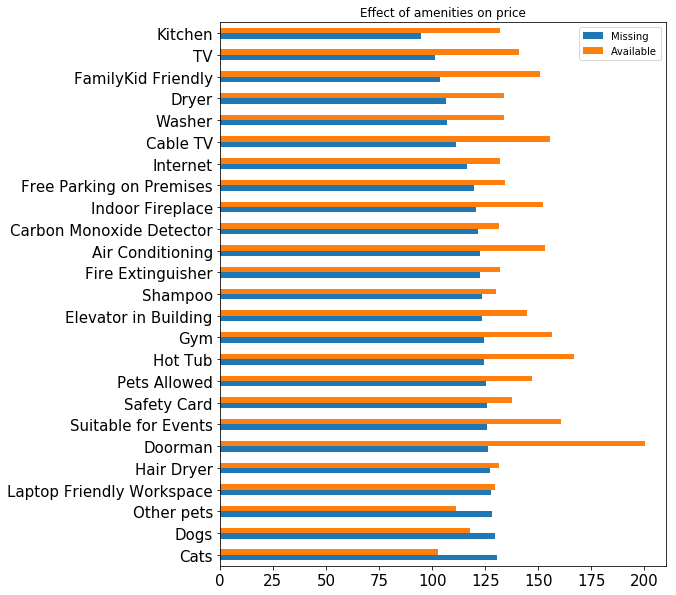

In [78]:
fig, ax = plt.subplots(figsize=(20, 12))
df_combined.plot.barh(legend=False, title="Effect of amenities on price", figsize=(8,10), fontsize=15, sort_columns=False, ax=ax)
ax.legend(["Missing", "Available"]);


#### 3.1.9 Final analysis of results

The presence of certain amenities is strongly correlated with higher prices. A residence with Cable TV makes on average 155 dollar per day, while a residence without Cable TV generates just 111 dollar. This does not necessarily mean, that a just by installing Cable TV you will generate additional 44 dollar a day. A correlation is not a causation. There might be other factors that are typically associated with Cable TV homes that are missing in homes without Cable TV. 

But a homeowner should consider upgrading his home with:
- Cable TV 
- Safety Card 
- Hot Tub 
- Gym 
- Fire Extinguisher 
- Air Conditioning
- Carbon Monoxide Detector
- Indoor Fireplace
- Free Parking on Premises
- Internet	
- Washer	
- Dryer
- TV
- Kitchen

To upgrade a home with an elevator might be expansive, but it has a significant impact on prices. 

There are some negative impacts, too:

- Other pets
- Dogs
- Cats 

Probably a homeowner can rise his prices by not allowing pets.

### 3.2 Business Question 2: When are people paying the high price ? 
In this section we try to identify the most popular times during the year among guests.
#### 3.2.1 Data preparation

To answer this question, we can use the price column in the listings dataset, as the price column in the calendar dataset is mostly null.

In [79]:
df_listings = pd.read_csv("data/listings.csv")
df_calendar = pd.read_csv("data/calendar.csv")
df_reviews = pd.read_csv("data/reviews.csv")

In [80]:
# check missing values
df_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [81]:
df_calendar_clean=df_calendar.drop(columns='price')

 Convert price strings to floats and join caledar data with listing.

In [82]:
# Rename id column to merge on
df_calendar_clean.rename(columns={'listing_id': 'id'},inplace=True)

# Convert listings price data into string, get subset of listings data
df_listings['price']=df_listings['price'].replace('[\$,]', '', regex=True).astype(float)
df_listings_price=df_listings[['id','price']]

# Join datasets on join column id.
df_result_price = pd.merge(df_calendar_clean, df_listings_price, how='left', on=['id'])

In [83]:
df_result_price.head(10)

,id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,85.0
3,241032,2016-01-07,f,85.0
4,241032,2016-01-08,f,85.0
5,241032,2016-01-09,f,85.0
6,241032,2016-01-10,f,85.0
7,241032,2016-01-11,f,85.0
8,241032,2016-01-12,f,85.0
9,241032,2016-01-13,t,85.0


We restrict our analysis the the offerings that are not available. We assume that if a property is not available, it is rented. Therefore the reported price is paid by some person and therefore reflects the market price.

In [84]:
result_price_xavailable=df_result_price[df_result_price['available']=='f']
result_price_xavailable=result_price_xavailable.groupby('date')['price'].mean()

In [85]:
from datetime import datetime
datetime.strptime('2016-01-13', "%Y-%m-%d")

datetime.datetime(2016, 1, 13, 0, 0)

In [86]:
result_price_xavailable.head()

date
2016-01-04    126.891023
2016-01-05    128.288057
2016-01-06    128.334839
2016-01-07    129.104799
2016-01-08    129.050589
Name: price, dtype: float64

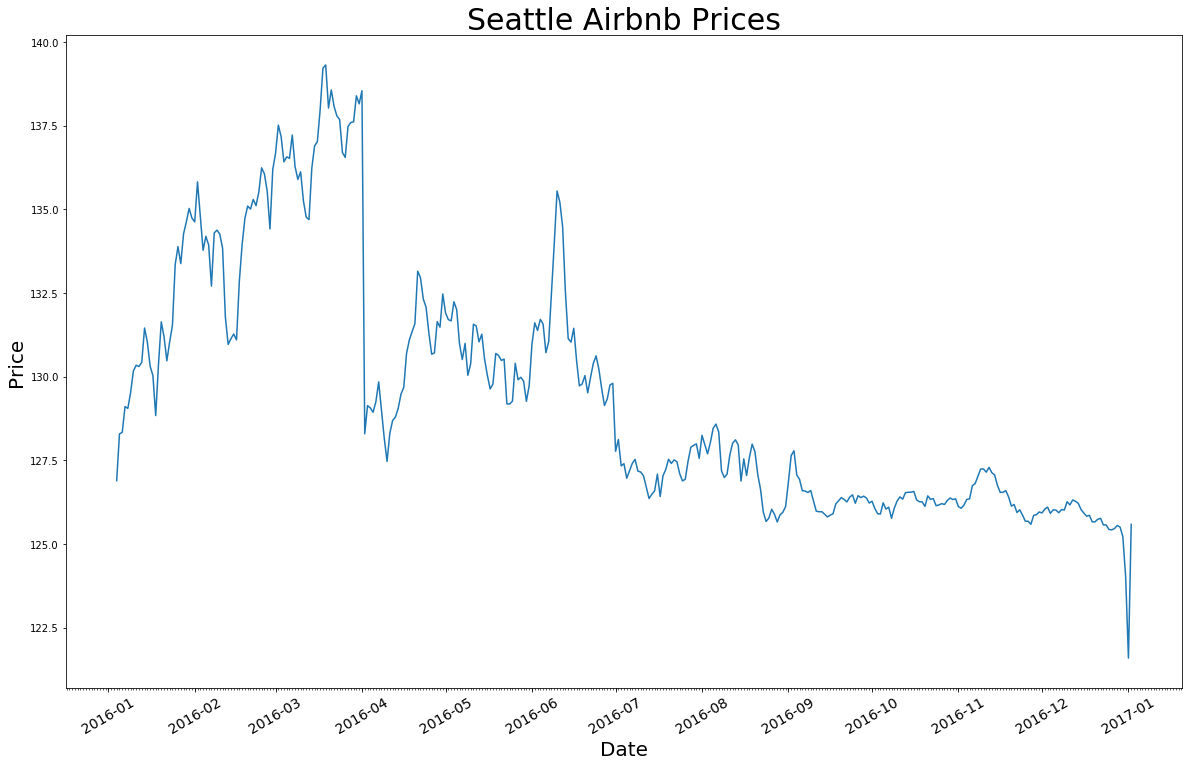

In [87]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every day
myFmt = mdates.DateFormatter('%Y-%m')

df=pd.DataFrame({
    'Date': result_price_xavailable.index, 
    'Price':result_price_xavailable.values
})
df["Date"] = pd.to_datetime(df["Date"])

fig, ax = plt.subplots(figsize=(20, 12))
ax.plot(df.Date, df.Price)
ax.xaxis.set_major_formatter(myFmt)
ax.set_title('Seattle Airbnb Prices', fontsize=30)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.xticks(fontsize=14, rotation=30)
#fig.autofmt_xdate()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(days)
plt.show()


In [88]:
df["Date"] = pd.to_datetime(df["Date"])

In [89]:
result_price_xavailable.sort_values(ascending=False).head(10)

date
2016-03-19    139.310502
2016-03-18    139.217593
2016-03-21    138.565766
2016-04-01    138.540856
2016-03-30    138.389720
2016-03-31    138.149577
2016-03-22    138.072581
2016-03-20    138.023723
2016-03-17    137.972553
2016-03-23    137.790468
Name: price, dtype: float64

#### 3.2.2 Analysis of results

There is a steady increase in prices during the first 3 months of 2016. We can see that the highest prices are paid during March 2016. There is also a sudden increase in prices in early June. Perhaps this is due to the Seattle Tradeshow 2016 located at Washington State Convention Center: Exhibit Hall 4B on June 8, 2016. In order to set prices competitively, it would be useful to check for tradeshows and fairs.

### 3.3 Business Question 3: Which area is having the highest price ?

In this section we try to locate districts within Seattle that are attractive for home owners that inted to offer these residencies using Airbnb.

#### 3.3.1 Data preparation

In [90]:
df_listings = pd.read_csv("data/listings.csv")
df_calendar = pd.read_csv("data/calendar.csv")
df_reviews = pd.read_csv("data/reviews.csv")

In [91]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [92]:
# Get subset of listings data
df_listings_location=df_listings[['id','neighbourhood_cleansed','price', 'latitude', 'longitude']]

In [93]:
# Sort neighbourhood by average price of house
df_listings_location.head()

,id,neighbourhood_cleansed,price,latitude,longitude
0,241032,West Queen Anne,$85.00,47.636289,-122.371025
1,953595,West Queen Anne,$150.00,47.639123,-122.365666
2,3308979,West Queen Anne,$975.00,47.629724,-122.369483
3,7421966,West Queen Anne,$100.00,47.638473,-122.369279
4,278830,West Queen Anne,$450.00,47.632918,-122.372471


Convert currencies into floats.

In [94]:
cols=['price']
df_listings_location[cols]=df_listings_location[cols].replace('[\$,]', '', regex=True).astype(float)
df_listings_location.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,id,neighbourhood_cleansed,price,latitude,longitude
0,241032,West Queen Anne,85.0,47.636289,-122.371025
1,953595,West Queen Anne,150.0,47.639123,-122.365666
2,3308979,West Queen Anne,975.0,47.629724,-122.369483
3,7421966,West Queen Anne,100.0,47.638473,-122.369279
4,278830,West Queen Anne,450.0,47.632918,-122.372471


In [95]:
# Group by neighbourhood
df_listings_location.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).head(10)

neighbourhood_cleansed
Southeast Magnolia     231.705882
Portage Bay            227.857143
Westlake               194.470588
West Queen Anne        187.769231
Montlake               182.789474
Briarcliff             176.571429
Sunset Hill            176.055556
Industrial District    173.333333
Alki                   171.619048
Windermere             169.900000
Name: price, dtype: float64

We restrict our analysis the the offerings that are not available. We assume that if a property is not available, it is rented. Therefore the reported price is paid by some person and therefore reflects the market price. 

The listings dataset is joined with the caledar data and the data frames are grouped by the neighbourhood.

In [96]:
# Merge dataset with relevant columns together
df_listings_price = df_listings_location[['id','price','neighbourhood_cleansed', 'latitude', 'longitude']]

# Merge datasets
df_merged = pd.merge(df_calendar_clean, df_listings_price, how='left', on=['id'])

# Filter unavailable
df_unavailable = df_merged[df_merged['available']=='f']

# Aggregate by neighbarhood_cleansed
df_mean = df_unavailable.groupby([df_unavailable['neighbourhood_cleansed']]).mean()
df_count = df_unavailable.groupby([df_unavailable['neighbourhood_cleansed']]).count()

# Merge Aggregations
df_neighbourhood = pd.merge(df_mean, df_count, how='left', on=['neighbourhood_cleansed'])

# Drop and rename columns
df_neighbourhood.drop(columns=['id_x', 'date', 'available', 'price_y', 'latitude_y', 'longitude_y'], inplace=True)
df_neighbourhood.rename(columns={'price_x': 'price', 'latitude_x': 'latitude', 'longitude_x': 'longitude', 'id_y': 'count'}, inplace=True)
df_neighbourhood['neighbourhood'] = df_neighbourhood.index
df_neighbourhood.head(10)

,price,latitude,longitude,count,neighbourhood
neighbourhood_cleansed,,,,,
Adams,115.133884,47.671330,-122.386220,9807,Adams
Alki,153.413006,47.575449,-122.408852,4075,Alki
Arbor Heights,95.655172,47.510262,-122.379525,435,Arbor Heights
Atlantic,104.067875,47.594873,-122.305617,7558,Atlantic
Belltown,164.992521,47.615280,-122.346224,32090,Belltown
Bitter Lake,83.272141,47.720777,-122.353145,1705,Bitter Lake
Briarcliff,186.438953,47.647622,-122.406131,688,Briarcliff
Brighton,58.404284,47.543512,-122.273031,1494,Brighton
Broadview,106.123697,47.716931,-122.360008,1439,Broadview


In [97]:
df_neighbourhood.to_csv('neighbourhood.csv', encoding='utf-8', index=False, sep=";")

Plot the Price values together with their geo locations, colors indicate the price, the size of the marker indicates the number of bookings.

Text(0.5,1,'Seattle Airbnb Prices')

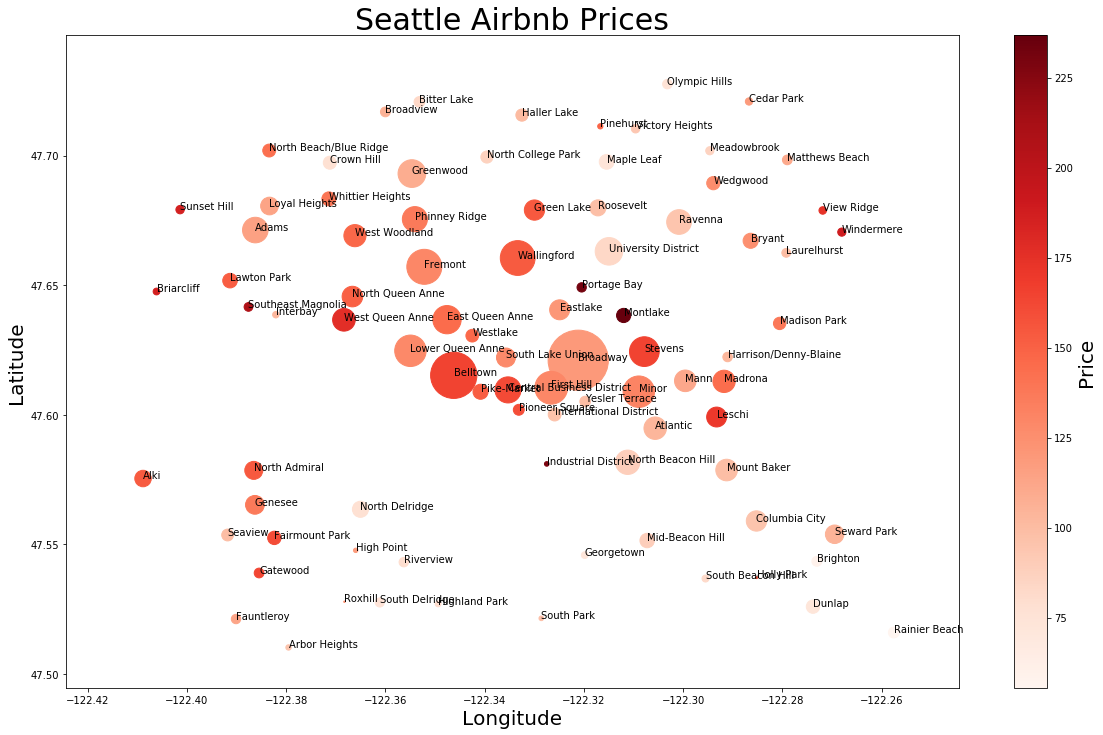

In [98]:
lon = df_neighbourhood['longitude'].values
lat = df_neighbourhood['latitude'].values
price = df_neighbourhood['price'].values
count = df_neighbourhood['count'].values
neighbourhood = df_neighbourhood['neighbourhood'].values

fig, ax = plt.subplots(figsize=(20, 12))
plt.scatter(lon, lat, c=price, s=count/15, cmap='Reds', label=neighbourhood)
ax.set_xlabel('Longitude', fontsize=20)
ax.set_ylabel('Latitude', fontsize=20)

cbar = plt.colorbar()
cbar.ax.set_ylabel('Price', fontsize=20)

plt.clim=(3,7)
for i, txt in enumerate(neighbourhood):
    plt.annotate(txt, (lon[i], lat[i]))
plt.title('Seattle Airbnb Prices', fontsize=30)


In order to improve the plot I wanted to use the Matplotlib Basemap Toolkit. Unfortenately there are some problems with this library, that prevent the usage within a Jupyter notebook. Therfore I have written Python code that uses this library and used this code within my Python IDE (PyCharme) to produce an image with a costline overlay. This makes it much easier to interpret these data. I decided to remove the longitude and latitude numbers from the plot, since the numbers have little information content.

The code is located within the helper.py file:

```
def plot():
    """
    This methods reads in neighbourhood data from 
    the file data/neighbourhood.csv and create a file seattle_prices.png, that 
    contains a Geoplot of Seattle Airbnb prices.
    :return: None
    """
    df = pd.read_csv("data/neighbourhood.csv", sep=";")
    fig, ax = plt.subplots(figsize=(20, 20))
    m = Basemap(projection='lcc', resolution='h', lat_0=47.63, lon_0=-122.3, width=2E4, height=3E4)

    m.drawcoastlines()
    m.drawrivers()
    m.drawstates()

    lon = df['longitude'].values
    lat = df['latitude'].values
    price = df['price'].values
    count = df['count'].values
    neighbourhood = df['neighbourhood'].values

    m.scatter(lon, lat, latlon=True, c=price, s=count/15, cmap='Reds')
    cbar = plt.colorbar(label='Price')
    cbar.ax.set_ylabel('Price', fontsize=20)

    for i, txt in enumerate(neighbourhood):
        x, y = m(lon[i], lat[i])
        plt.text(x, y, txt)

    ax.set_xlabel('Longitude', fontsize=20)
    ax.set_ylabel('Latitude', fontsize=20)
    plt.title('Seattle Airbnb Prices', fontsize=40)

    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)

    for a in [100, 1000, 5000]:
        plt.scatter([], [], c='red', alpha=0.5, s=a/15, label=str(a))
    plt.scatter([], [], c='red', alpha=0.5, s=0, label='Bookings')
    plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='lower right')

    plt.savefig('seattle_prices.png')
```

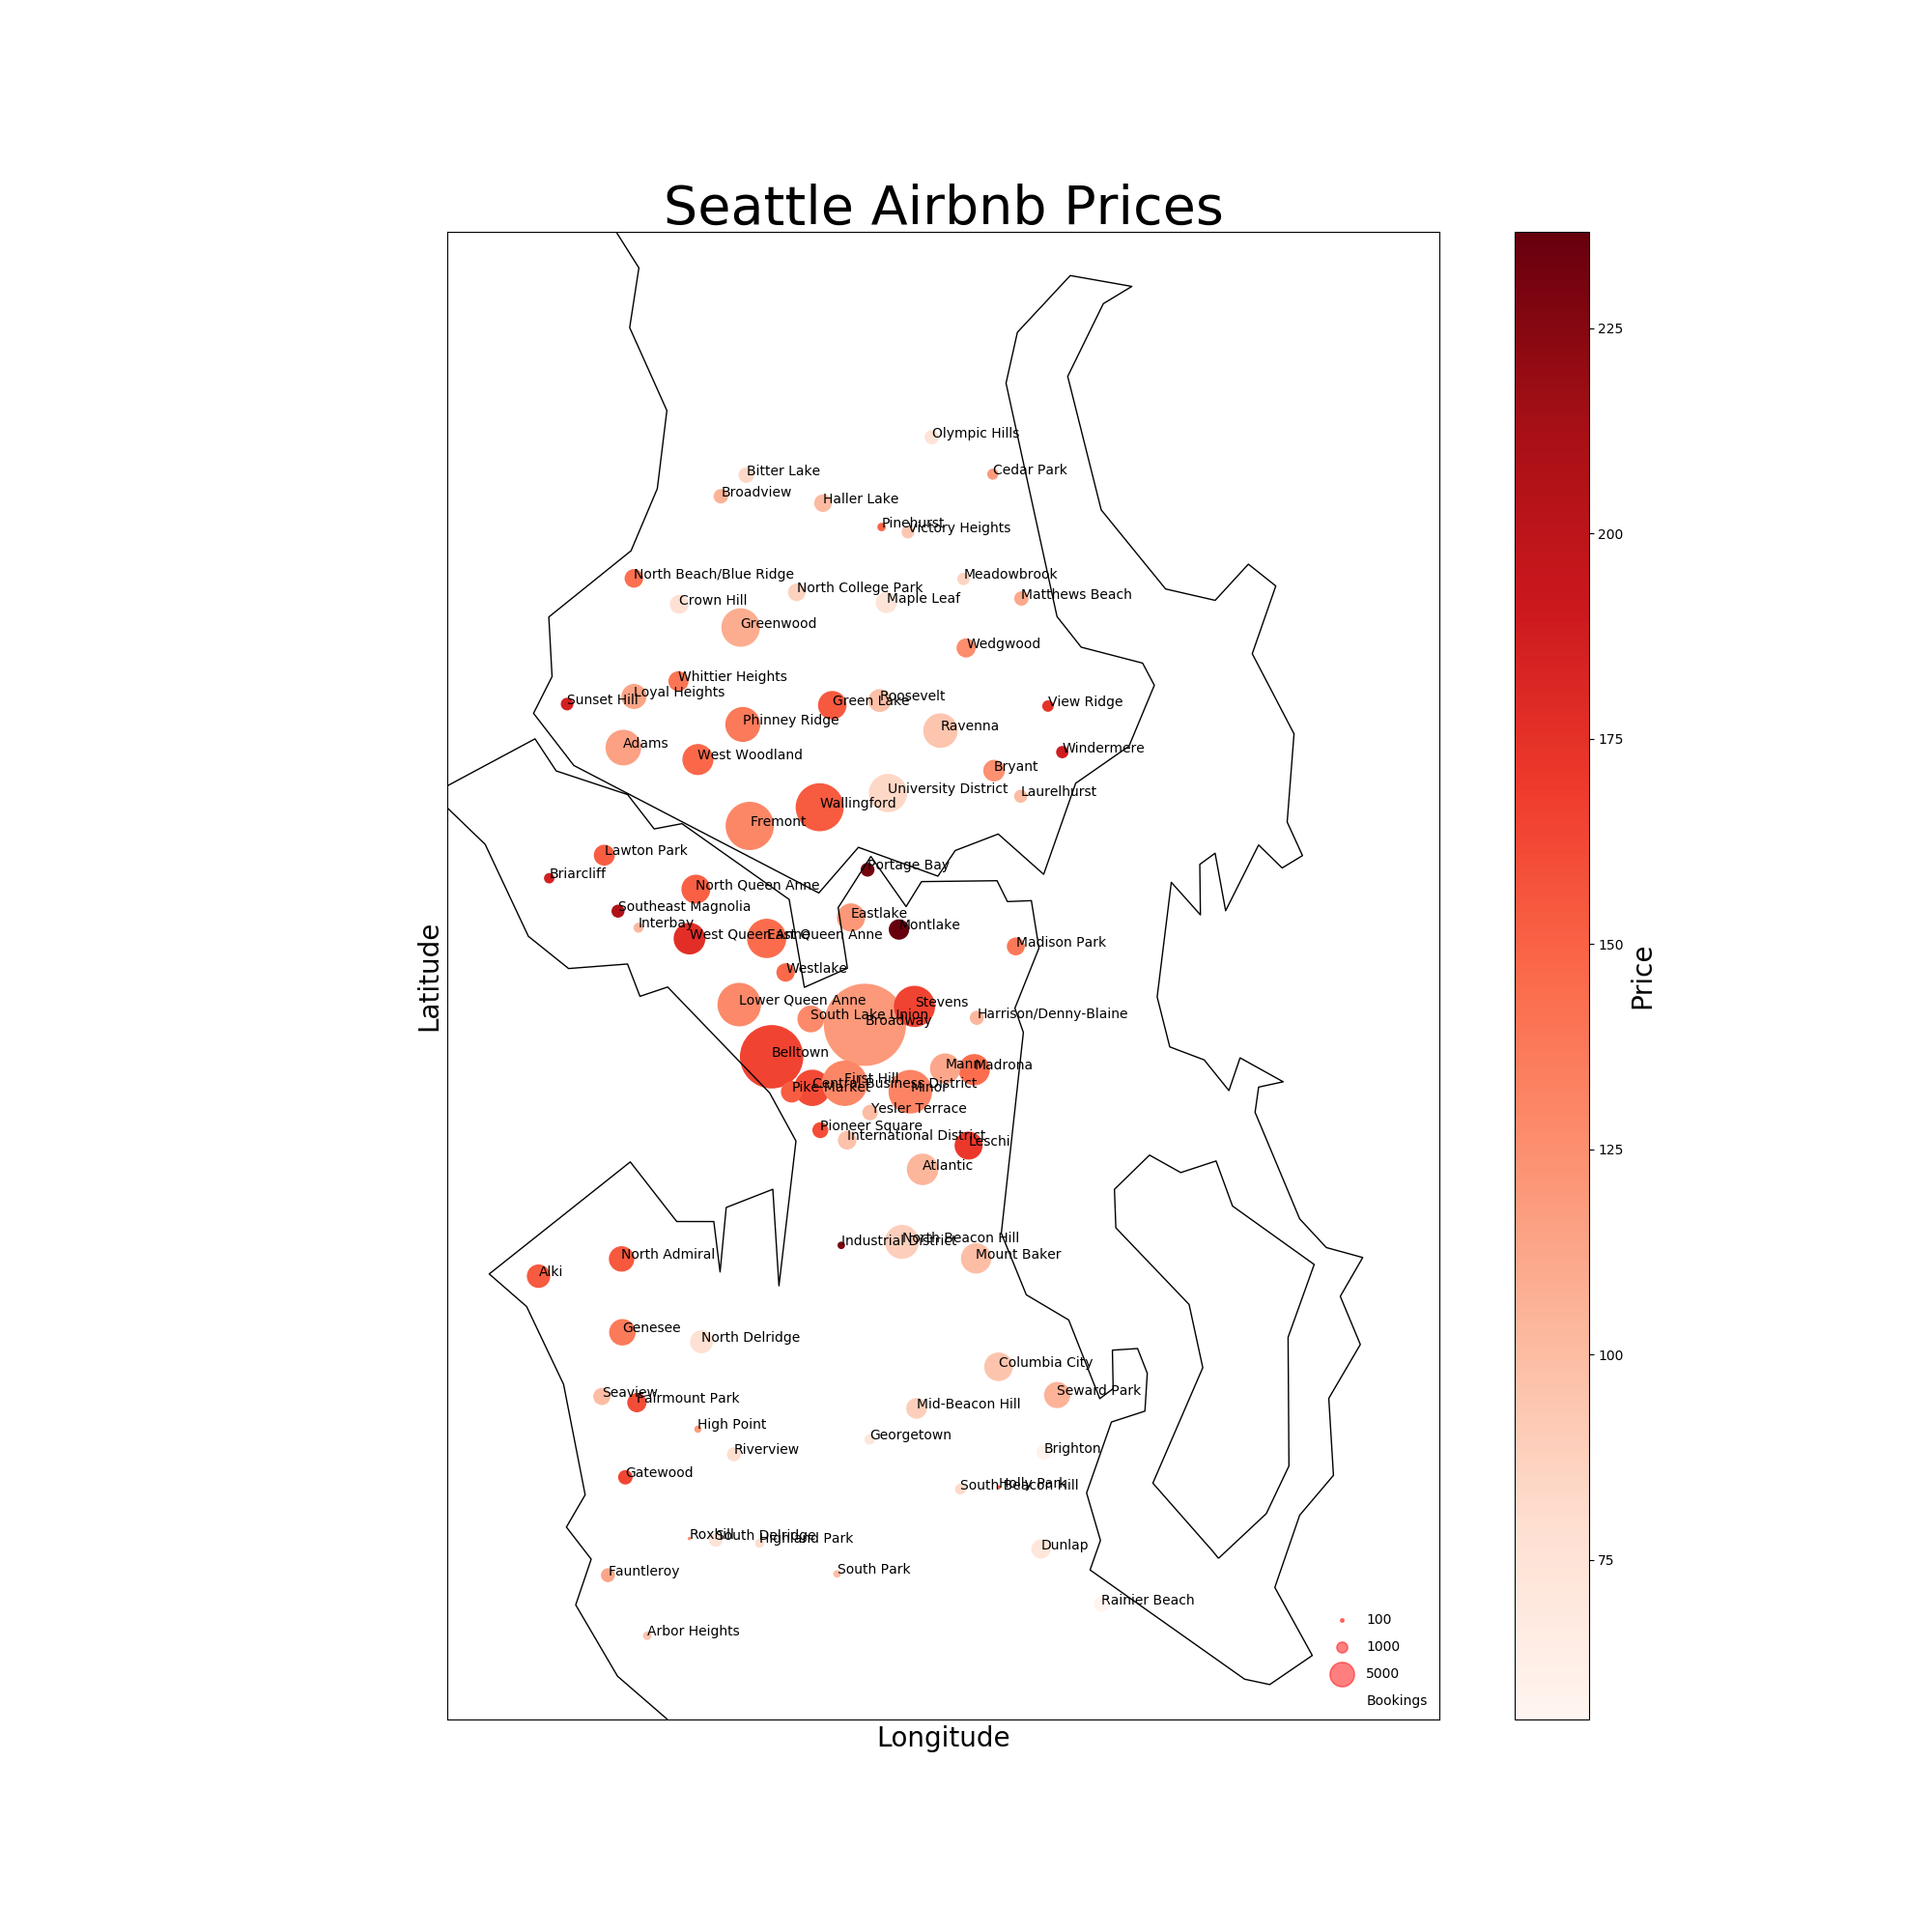

In [99]:
from IPython.display import Image
Image(filename='Images/seattle_prices.png') 

#### 3.3.2 Analysis of results

We can see, that there a some regions where much higher prices are paid, for example Portage Bay and Montlake. This is probably due to the fact, that Portage Bay is one of the larger remaining enclaves of houseboats in Seattle. Houseboats achieve on average higher prices. Montlake is a wealthy residential neighborhood in central Seattle, therefore it is safe to assume, that most residences are quite extravagant. But there are not many bookings within these neighbourhoods.

But there are a lot of bookings in Belltown, that is located near a waterfront. Residences within this district receive still above average prices. This district is densely populated and located near the city center. 

Residences located far away from the city center generate lower prices. The number of offerings is lower, too. This degradation in both price and number is larger when you move away in south-east direction from the city center than in north-west direction.

## 4 Conclusion

There is a large range of prices Seattle home owners demand for their services. Some amenities seem to have a large impact on prices despite being quite cheap. These amenities are a prudent investment.Most offerings are located near the city center, with a drop of prices and the number of offerings farther away. 